In [4]:
import csv
import copy
import numpy as np
import matplotlib.pyplot as plt

In [5]:
dir_name = './../results/SL_SFL/mobilenet_v2_cifar10/2024-07-23/'
batch_type_list = ['B128', 'B64']
data_type_list = ['IID', 'N-IID-ClassSep', 'N-IID-Diri-06', 'N-IID-Diri-03']
epoch_type_list = ['R25_E10', 'R50_E5']
extension = 'accuracy.csv'

data_dict = {'epoch': [], 'accuracy': []} # ここにlossを追加したらlossもプロットできる
batch_dict = {}
epoch_dict = {}
data_type_dict = {}


for data_type in data_type_list:
    data_type_dict[data_type] = copy.deepcopy(data_dict) # data_type_dict['data_type] = {'epoch': None, 'accuracy': None}
for epoch_type in epoch_type_list:
    epoch_dict[epoch_type] = copy.deepcopy(data_type_dict)
for batch_type in batch_type_list:
    batch_dict[batch_type] = copy.deepcopy(epoch_dict)

for batch_type, value1 in batch_dict.items():
    print(f'■ batch type is {batch_type}')

    for epoch_type, value2 in value1.items():
        print(f'\t■ epoch type is {epoch_type}')

        for data_type, value3 in value2.items():
            print(f'\t\t■ data type is {data_type}')
            data_dict ={'epoch': [], 'accuracy': []}

            file_path = dir_name + '/accuracy/' + data_type + '_' + batch_type + '_' + epoch_type + '_' + extension
            with open(file_path) as f:
                csv_reader = csv.reader(f, delimiter=',')
                for row in csv_reader:
                    data_dict['epoch'].append(int(row[0]))
                    data_dict['accuracy'].append(float(row[1]))
            if len(data_dict['epoch']) == 25:
                data_dict['epoch'] = [ x * 10 for x in data_dict['epoch'] ]
            elif len(data_dict['epoch']) == 50:
                data_dict['epoch'] = [ x * 5 for x in data_dict['epoch'] ]
            batch_dict[batch_type][epoch_type][data_type] = data_dict

            print(f'\t\t\t■ data is epoch')
            print('\t\t\t\t', batch_dict[batch_type][epoch_type][data_type]['epoch'])
            print(f'\t\t\t■ data is accuracy')
            print('\t\t\t\t', batch_dict[batch_type][epoch_type][data_type]['accuracy'])

■ batch type is B128
	■ epoch type is R25_E10
		■ data type is IID
			■ data is epoch
				 [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250]
			■ data is accuracy
				 [17.77, 62.42, 64.43, 64.91, 64.6, 65.7, 66.03, 65.98, 65.71, 66.52, 66.21, 66.82, 67.42, 66.37, 66.51, 66.31, 66.25, 67.03, 66.83, 67.18, 66.9, 67.06, 67.38, 67.73, 67.52]
		■ data type is N-IID-ClassSep
			■ data is epoch
				 [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250]
			■ data is accuracy
				 [14.91, 29.49, 35.99, 37.67, 38.32, 39.83, 40.76, 39.76, 39.91, 39.71, 42.73, 40.47, 44.21, 43.33, 42.77, 43.02, 44.04, 45.75, 42.95, 45.11, 46.34, 47.94, 48.29, 50.46, 49.69]
		■ data type is N-IID-Diri-06
			■ data is epoch
				 [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250]
			■ data is accuracy
				 [21.22, 48.99, 58

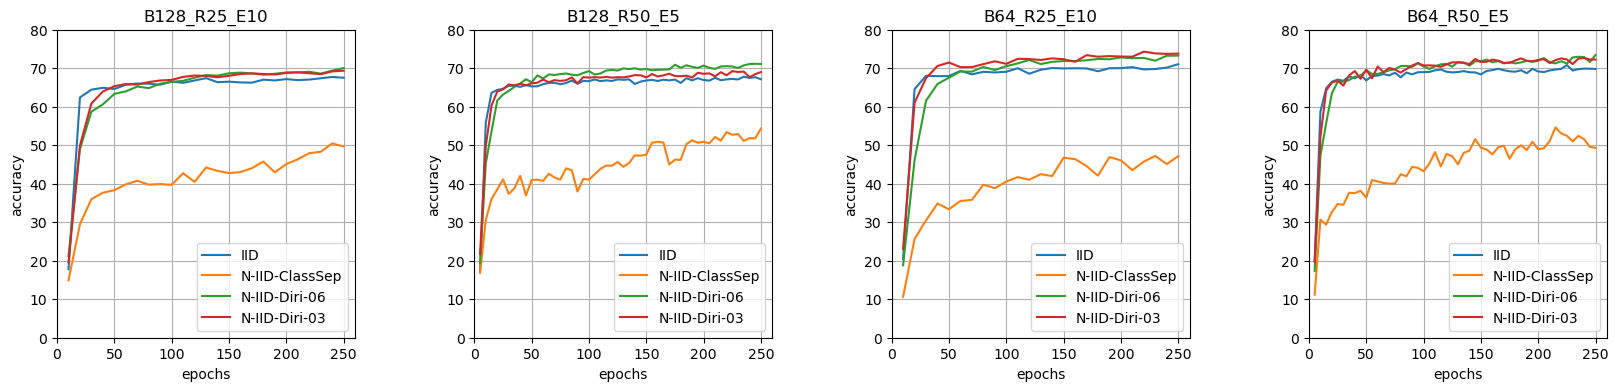

In [6]:
# 各学習パターンごとにプロットして精度を比較
fig, axes = plt.subplots(1, 4, figsize=(20, 4))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, batch_type in enumerate(batch_type_list):
    for j, epoch_type in enumerate(epoch_type_list):
        ax = axes[j+i*2]
        for data_type in data_type_list:
            epoch = batch_dict[batch_type][epoch_type][data_type]['epoch']
            accuracy = batch_dict[batch_type][epoch_type][data_type]['accuracy']
            ax.plot(epoch, accuracy, label=data_type)
        ax.set_title(batch_type + '_' + epoch_type)
        ax.set_xlabel('epochs')
        ax.set_ylabel('accuracy')
        ax.set_ylim((0, 80))
        ax.set_xlim((0, 260))
        ax.grid(True)
        ax.legend()
plt.show()

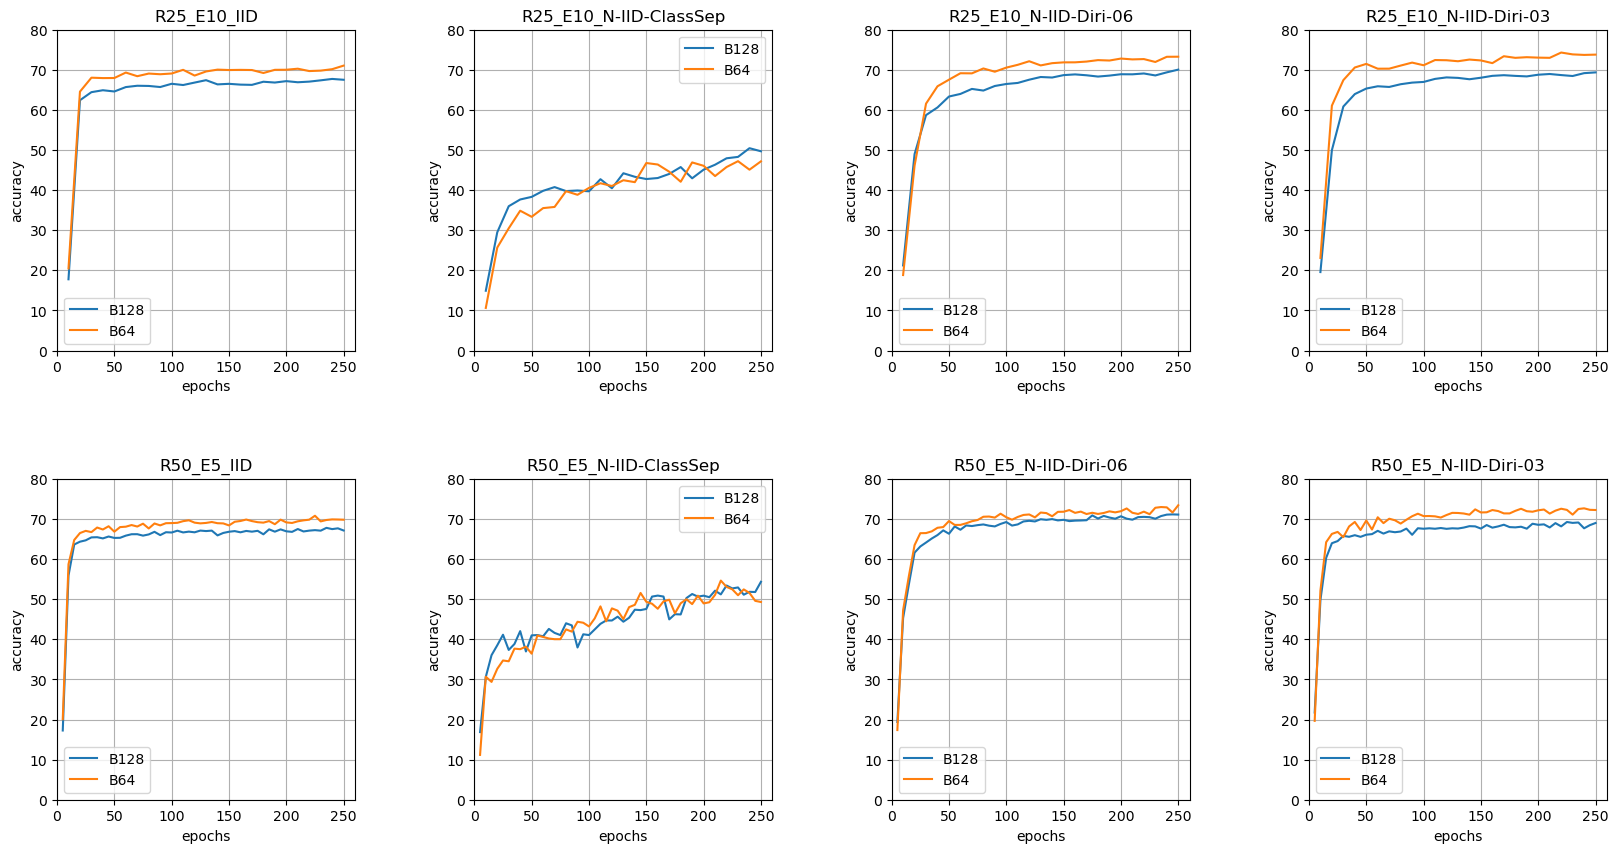

In [7]:
# バッチサイズ間の比較
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, epoch_type in enumerate(epoch_type_list):
    for j, data_type in enumerate(data_type_list):
        ax = axes[i, j]
        for batch_type in batch_type_list:
            epoch = batch_dict[batch_type][epoch_type][data_type]['epoch']
            accuracy = batch_dict[batch_type][epoch_type][data_type]['accuracy']
            ax.plot(epoch, accuracy, label=batch_type)
        ax.set_title(epoch_type + '_' + data_type)
        ax.set_xlabel('epochs')
        ax.set_ylabel('accuracy')
        ax.set_ylim((0, 80))
        ax.set_xlim((0, 260))
        ax.grid(True)
        ax.legend()

plt.show()
        

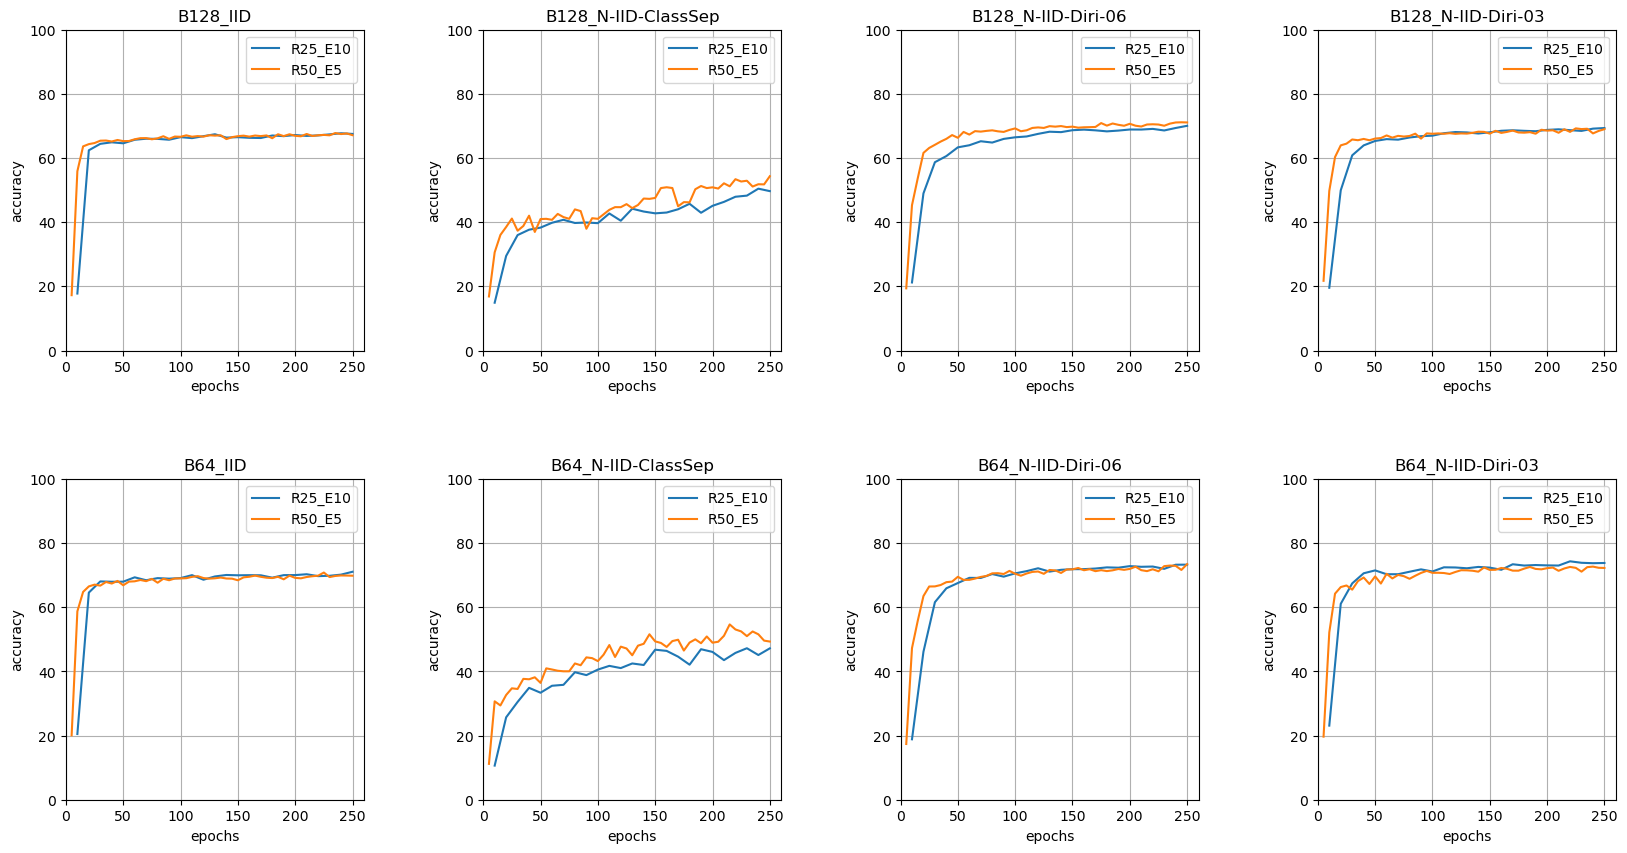

In [9]:
# プロットの設定
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# エポック条件の比較
for i, batch_type in enumerate(batch_type_list):
    for j, data_type in enumerate(data_type_list):
        ax = axes[i, j]
        for epoch_type in epoch_type_list:
            epoch = batch_dict[batch_type][epoch_type][data_type]['epoch']
            accuracy = batch_dict[batch_type][epoch_type][data_type]['accuracy']
            ax.plot(epoch, accuracy, label=epoch_type)
        ax.set_title(batch_type + '_' + data_type)
        ax.set_xlabel('epochs')
        ax.set_ylabel('accuracy')
        ax.set_ylim((0, 100))  # y軸の上限を100に設定
        ax.set_xlim((0, 260))
        ax.grid(True)
        ax.legend()

# プロットを表示
plt.show()
